In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(f'Training set shape: {train_images.shape}')
print(f'Testing set shape: {test_images.shape}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


In [2]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 2D image to 1D vector
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8749 - loss: 0.4416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9642 - loss: 0.1237
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9766 - loss: 0.0804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9857 - loss: 0.0455


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9728 - loss: 0.0907
Test accuracy: 0.9758999943733215


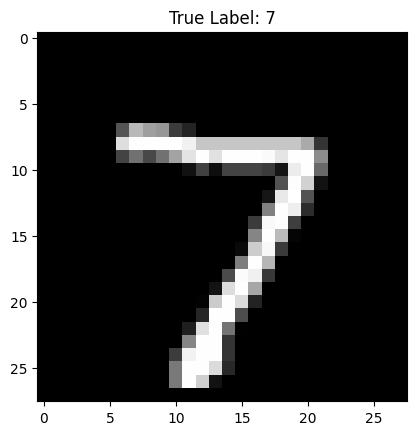

In [7]:
import numpy as np

# Pick an image from test set, e.g. index 0
img = test_images[0]  # shape (28, 28), values normalized between 0-1

plt.imshow(img, cmap='gray')
plt.title(f"True Label: {test_labels[0]}")
plt.show()


In [8]:
# Expand dims to make it (1, 28, 28)
img = np.expand_dims(img, 0)

# Predict probabilities for each digit class
predictions = model.predict(img)

print(f"Predicted probabilities: {predictions}")

# Find the class with highest probability
predicted_digit = np.argmax(predictions)

print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Predicted probabilities: [[4.9611759e-09 5.2154604e-08 1.8293032e-06 4.8103309e-05 5.3912097e-11
  5.3173121e-08 3.9399304e-12 9.9994946e-01 9.0948049e-08 3.1604432e-07]]
Predicted Digit: 7


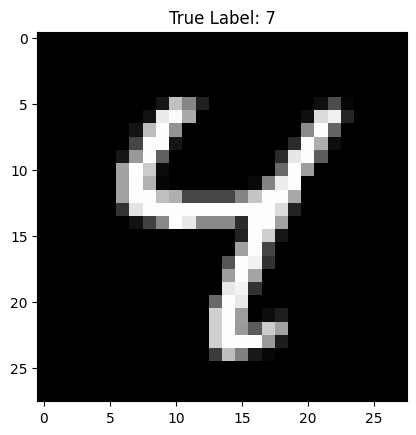

In [9]:
# Pick an image from test set, e.g. index 6
img = test_images[6]  # shape (28, 28), values normalized between 0-1

plt.imshow(img, cmap='gray')
plt.title(f"True Label: {test_labels[0]}")
plt.show()


In [10]:
# Expand dims to make it (1, 28, 28)
img = np.expand_dims(img, 0)

# Predict probabilities for each digit class
predictions = model.predict(img)

print(f"Predicted probabilities: {predictions}")

# Find the class with highest probability
predicted_digit = np.argmax(predictions)

print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted probabilities: [[2.9084088e-09 1.0694716e-07 2.3030394e-07 9.8261417e-08 9.9804026e-01
  1.9480835e-06 3.8668954e-08 1.7546210e-04 1.6496436e-03 1.3228618e-04]]
Predicted Digit: 4
